<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/KAPUR-S-ENTROPY/blob/master/KAPUR_ENTROPY_FOR_TWO_THRESHOLD_VALUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAPUR'S ENTROPY FOR FOUR THRESHOLD VALUES

# IMPORTING THE LIBRARIES

In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# READ AN IMAGE AND CONVERT IT INTO GREYSCALE

In [2]:
image = Image.open('lena.tiff').convert("L")
print(image)

<PIL.Image.Image image mode=L size=512x512 at 0x7F8B1073EBA8>


# DEFINE THE THRESHOLD VALUES

In [0]:
thresholds=[97,164]
thresholds.append(255)
thresholds.insert(0,0)

# CONVERT IMAGE INTO ARRAY

In [4]:
img = np.asarray(image)#Convert given input into array
print(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


# MAKING HISTOGRAM

In [0]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256,dtype=float)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='edge', alpha=0.25)
    plt.show()
    return y

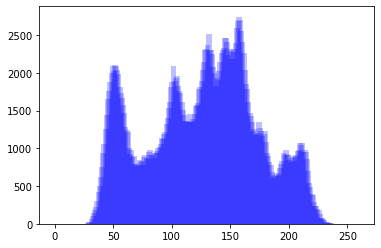

In [6]:
h=Hist(img)

# COUNTING THE PIXELS

In [7]:
cnt = 0
for i in range(0, len(h)):
    if h[i]>0:
           cnt += h[i]
            
print(cnt)

262144.0


# FINDING PROBABILITIES OF AN INDIVIDUAL PIXELS

In [0]:
prob=[]
for i in range (len(h)):
    h[i]=h[i]/cnt
    prob.append(h[i])

# KAPUR'S ENTROPY CALCULATION

In [0]:
w0=prob[:]

In [10]:
SUM=[]
for i in range(len(thresholds)-1):
    SUM.append(sum(h[thresholds[i]:thresholds[i+1]]))
    
print(SUM)

[0.2873077392578125, 0.5110206604003906, 0.20167160034179688]


In [11]:
print(w0[164])
print(w0[97])


0.005619049072265625
0.006893157958984375


In [0]:

for i in range(0,w0.index(0.006893157958984375)):
    w0[i]=w0[i]/SUM[0]
for i in range(w0.index(0.006893157958984375),w0.index(0.005619049072265625)):
    w0[i]=w0[i]/SUM[1]

for i in range(w0.index(0.005619049072265625),256):
    w0[i]=w0[i]/SUM[2]

In [13]:
print(w0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3277391258165596e-05, 9.294173880715917e-05, 0.0002522704339051463, 0.00038504434648680227, 0.0007833660842317702, 0.0012879069520420627, 0.0018190026023686865, 0.002416485208986138, 0.0029343034680545965, 0.0039699399861915135, 0.0056030591109458815, 0.0066254182378246325, 0.008152318232513675, 0.010064262573689522, 0.012533857347708323, 0.014074034733655531, 0.016663126028997822, 0.019132720803016624, 0.0218811407934569, 0.023368208614371448, 0.025014605130383984, 0.02652822773381486, 0.027749747729566093, 0.026860162515269, 0.027895799033405916, 0.027723192947049762, 0.026953104254076158, 0.026262679908651547, 0.024005523394763396, 0.02296988687662648, 0.022146688618620212, 0.020938446014127143, 0.01950448775824526, 0.01696850602793563, 0.016410855595092675, 0.016198417334962027, 0.013317223431940093, 0.012347973870094004, 0.012945456476711456, 0.0116841043

In [0]:
w1=prob[:]

In [0]:
for i in range(0,w1.index(0.006893157958984375)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[0])
for i in range(w1.index(0.006893157958984375),w1.index(0.005619049072265625)):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[1])   
for i in range(w1.index(0.005619049072265625),256):
    if w1[i]==0:
        w1[i]=w1[i]
    else:
        w1[i]=math.log(w1[i]/SUM[2])



In [16]:
print(w1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -11.22944787461632, -9.283537725561006, -8.285008895449879, -7.862152044629845, -7.1519104307106, -6.6547368961129365, -6.309466948788194, -6.025441187539524, -5.831285173098566, -5.5290043012256325, -5.184442560580307, -5.0168417788648005, -4.809452946469176, -4.598764488973948, -4.379321708470818, -4.2634236875102065, -4.0945570230504345, -3.956355278616797, -3.822130164146902, -3.7563787865841216, -3.688295419480011, -3.62954591540782, -3.5845285296574625, -3.6171110374485735, -3.5792791737713188, -3.58548592561379, -3.6136568025804863, -3.639606362433662, -3.7294713336641974, -3.7735711871244946, -3.810067291697627, -3.866168287653281, -3.9371106984424418, -4.076396239678839, -4.109812236598683, -4.122841736889017, -4.3186970866543835, -4.394263288469017, -4.347010403618472, -4.449525967144067, -4.43486129373982, -4.558681553770445, -4.54733927716651, -4.584

In [17]:
mul=[]
for i in range(len(w0)):
    mul.append(w0[i]*w1[i])
    
print(mul)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00014909777304445695, -0.0008628281384954995, -0.002090062788963138, -0.0030272771960043747, -0.005602564068882115, -0.008570681912514668, -0.011476936799404942, -0.014560389507305132, -0.01711076030663847, -0.021949815259260506, -0.029048738124235085, -0.03323867501797142, -0.03920819094391728, -0.046283173331592924, -0.05488979357369553, -0.06000357306230839, -0.06822811970800753, -0.07569584094331623, -0.08363256825261689, -0.08777984311949724, -0.09226125352249642, -0.09628542061427618, -0.09946976242742706, -0.09715619030164194, -0.09984685251597988, -0.09940111812472241, -0.09739926853840335, -0.09558581689008687, -0.08952791135037533, -0.08667850328914674, -0.08438037392521697, -0.0809515559725586, -0.07679132742062705, -0.06917035416524453, -0.06744553513776583, -0.066783511060128, -0.057513054037845165, -0.05426024826432877, -0.05627403398385483, -0.

In [18]:
kapur_entropy=[]
for i in range(len(thresholds)-1):
    kapur_entropy.append(-(sum(mul[thresholds[i]:thresholds[i+1]])))
    
print(kapur_entropy)

[4.105067273611205, 4.185484387890942, 4.0558493649527305]


# RESULTS

In [19]:
J=sum(kapur_entropy)
print(J)

12.346401026454878
